## Deep Learning Final Project

In [180]:
import tensorflow as tf
import torch
import torch.nn as nn
from torchvision import models
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2


### STEP 1: DATASET PREPARATION
We will be using the PASCAL VOC2021 DATASET 
- "Annotation" has the XML file 
- "JPEGImages" folder has respective images
- Required dataset format to implement faster r-cnn:
    * [Filename, Xmin, Xmax, Ymin, Ymax, Class]

In [142]:
# Path of the downloaded dataset
annotation_directory = "/Users/Namithalu/Desktop/Deep Learning Project/VOC2012/Annotations"
image_directory = "/Users/Namithalu/Desktop/Deep Learning Project/VOC2012/JPEGImages"

# Collecting the xml files into a list
xml_files=[]
for filename in os.listdir(annotation_directory):
    if filename.endswith(".xml"):
        xml_files.append(ET.parse(annotation_directory+"/"+filename)) 

In [143]:
# Empty arrays initialization for dataset format
file_name=[]
classification=[]
xmin=[]
xmax=[]
ymin=[]
ymax=[]

# Iterating the xml file to find objects and its bounding box coordinates
for i in range(0,len(xml_files)):
    for item in xml_files[i].iterfind('object'):
        for size in item.iterfind('bndbox'):  
            classification.append(item.findtext('name'))
            file_name.append(xml_files[i].findtext('filename'))
            xmin.append(size.findtext('xmin'))
            ymin.append(size.findtext('ymin'))
            xmax.append(size.findtext('xmax'))
            ymax.append(size.findtext('ymax'))
            
# Creating dataframe
dataset_properties_pd = pd.DataFrame({'file_name': file_name,'classification':classification, 'xmin':xmin, 'xmax':xmax, 'ymin':ymin, 'ymax':ymax})
print("Size of different objects in the entire dataset=", len(dataset_properties_pd))
dataset_properties_pd


Size of different objects in the entire dataset= 40138


,file_name,classification,xmin,xmax,ymin,ymax
0,2011_006135.jpg,person,391,470,144,315
1,2008_006482.jpg,chair,155,233,321,411
2,2008_006482.jpg,diningtable,1,201,341,411
3,2010_005054.jpg,tvmonitor,86,121,34,70
4,2010_005054.jpg,sofa,318,427,42,111
...,...,...,...,...,...,...
40133,2011_001643.jpg,bicycle,16,496,35,325
40134,2007_005124.jpg,cow,179,500,68,324
40135,2007_005124.jpg,person,3,271,33,324
40136,2009_002295.jpg,bicycle,27,349,281,476


In [126]:
# drawing bounding box for few images for visualization 
sample_plot_images=dataset_properties_pd[:5]

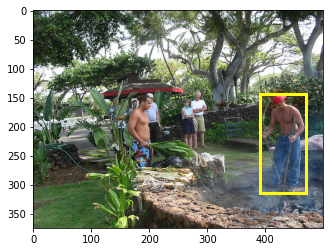

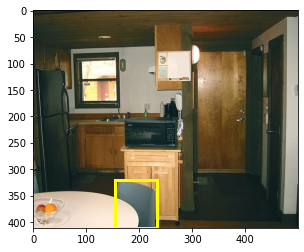

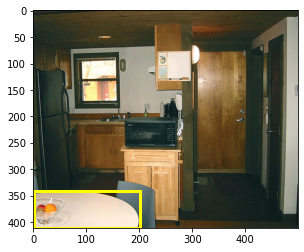

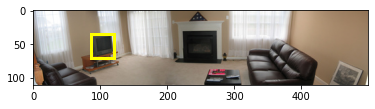

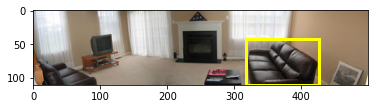

In [179]:
# drawing bounding boxes
for i in range(0,len(sample_plot_images)):
    file_name_split=sample_plot_images["file_name"][i].split(".")
    xmin=int(sample_plot_images["xmin"][i])
    xmax=int(sample_plot_images["xmax"][i])
    ymin=int(sample_plot_images["ymin"][i])
    ymax=int(sample_plot_images["ymax"][i])
    file_name=file_name_split[0]
    image_file = Image.open(image_directory+"/"+file_name+".jpg", "r")
    fig, ax = plt.subplots()
    ax.imshow(image_file)
    bounding_box = patches.Rectangle((xmax,ymax),xmin-xmax, ymin-ymax, linewidth=3, edgecolor='yellow', facecolor='none')
    ax.add_patch(bounding_box)
    plt.show()

### STEP 2: IMPLEMENTING VGG

### STEP 3: ROI POOLING